In [1]:
import sys
import os
# Add the directory containing 'thesis_utils.py' to the system path
sys.path.append(os.path.abspath('..'))  # If 'thesis_utils.py' is one level up
# Or use this if it's in the same directory as the notebook:
# sys.path.append(os.getcwd())
# os.environ["JULIA_NUM_THREADS"] = "8" 
os.environ["PYTHON_JULIACALL_HANDLE_SIGNALS"] = "yes"
os.environ["PYTHON_JULIACALL_THREADS"] = "auto"
os.environ["PYTHON_JULIACALL_OPTLEVEL"] = "3"
from pysr import PySRRegressor
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

from thesis_utils import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [ ]:
import importlib
import thesis_utils  # or whatever your module is called

importlib.reload(thesis_utils)

from thesis_utils import *

In [3]:
data = pd.read_csv("C:/Users/svenl/vs_code_projects/hyperRealDataDescriber/data/real_estate/real_estate_valuation_cleaned.csv")

In [ ]:
# Generate the profiling report
profile_full = ProfileReport(data, title="real_estate_valuation_cleaned", explorative=True)

# Display the report in the notebook
profile_full.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# variable assignment according to correlation structure
independents_lst = ['X2 distance MRT station', 'X3 number convenience stores', 'X4 lat']
dependent_var = 'X6 price'
X = data[independents_lst].to_numpy()
y = data[dependent_var].to_numpy()

28.9**2 * RBF(length_scale=30) + WhiteKernel(noise_level=40)


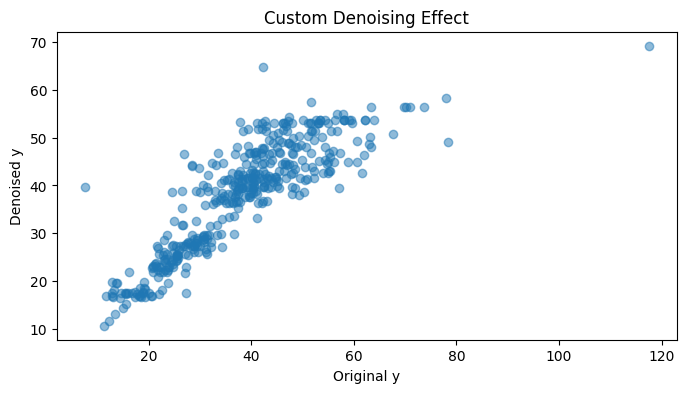

In [13]:
%matplotlib inline
y_denoised = bound_denoise(X, y, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 40), show_denoising_effect=True)

In [14]:
sr_model = PySRRegressor(
        niterations=1024,  # Number of iterations to search for equations
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["sin", "cos", "exp", "log", "abs", "sqrt"],
        elementwise_loss="loss(x, y) = (x - y)^2",  # Define loss function (mean squared error)
        verbosity=0,
        maxsize=50
    )
sr_model.fit(X, y)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          37.980766   
	1         0.111797                                     x1 + 33.885845   
	2         0.349075                                237.22453 / log(x0)   
	3         0.032018                    (x0 * -0.0072619948) + 45.85126   
	4         0.183374                        1878.5112 / (sqrt(x0) + x2)   
	5         0.051874                   (log(x0) + -12.534787) / sin(x2)   
	6         0.000598              (log(x0) + -12.507999) / sin(sin(x2))   
	7         0.072639     (log(x0) + -11.058115) / sin(x2 + 0.038314905)   
	8         0.001536  (log(x0 + x1) + -11.083734) / sin(x2 + 0.03793...   
	9         0.005721  ((log(x0) + -11.099997) / sin(x2 + 0.03732601)...   
	10        0.008566  ((log(x0) + -11.056689) / sin(x2 + 0.038310774...   
	11        0.011638  ((log(x0) + -11.162998) / sin(x2 + 0.035876073...   
	12        0.005962  ((log(x0) + -10.988822) / sin(x2 + 0.040210444...   
	13        0.000876  ((log(x0) + -10.988822) / sin(x2 + 0.040210422...   
	14        0.006811  ((log(x0) + -11.27405) / sin(x2 + 0.033941712)...   
	15  >>>>  0.078881  ((log(x0) + -11.044663) / sin(x2 + 0.038317684...   
	16        0.007990  ((-0.034252837 / sin((x2 * x0) + sqrt(x0))) - ...   
	17        0.002029  ((log(x0) + -11.278571) / sin(x2 + 0.03159497)...   
	18        0.041016  ((log(x0) + -11.278571) / sin(x2 + 0.03159497)...   
	19        0.002861  ((log(x0) + -11.278571) / sin(x2 + 0.03159497)...   
	20        0.007042  (((log(x0) + -11.556464) / sin(x2 + 0.03299733...   
	21        0.021065  ((log(x0) + -11.183602) / sin(x2 + 0.035148006...   
	22        0.001160  ((-11.183602 + log(x0)) / sin(0.035148006 + x2...   
	23        0.012145  sqrt(x1) + ((((sin(x0 + sqrt(x0)) * 0.25271463...   
	24        0.009069  abs((((-0.3861069 * sin((sqrt(x0) + log(x0)) +...   
	25        0.004913  ((log(x0) + -12.528727) / (sin(x2) + 0.0293726...   
	26        0.008511  sqrt(x1) + (((-0.19639869 - (sin(x0 + (log(x0)...   
	27        0.003185  ((((log(x0) + -12.33275) / (sin(x2) + 0.021401...   
	28        0.001885  ((log(x0) + -10.649804) / (0.03464087 + sin(x2...   
	29        0.009301  ((log(x0) + -10.491827) / sin(x2 + 0.03730958)...   
	30        0.013024  abs((((log(x0) + -10.931357) / sin(x2 + 0.0351...   
	31        0.007835  abs((sin(sqrt(x0)) * -3.9549692) + 1.5642709) ...   
	32        0.000005  abs((sin(sqrt(x0)) * -3.9549692) + 1.5642709) ...   
	33        0.013739  (abs((-4.787911 * sin(sqrt(x0))) + 1.7627835) ...   
	34        0.006713  (((log(x2 + x0) + -10.56034) / sin(0.04204012 ...   
	35        0.002730  (abs((sin(sqrt(x0)) * -4.728533) + 1.770054) +...   
	36        0.000589  abs((((-10.694122 + log(x2 + x0)) / sin(x2 + 0...   
	37        0.012270  ((((log(x2 + x0) + -10.694106) / sin(x2 + 0.03...   
	38        0.000011  ((((log(x2 + x0) + -10.694106) / sin(x2 + 0.03...   
	39        0.004953  (((((x2 / x0) + log(x0)) + -10.694128) / sin(x...   
	
	          loss  complexity  
	0   184.689240           1  
	1   147.684890           3  
	2   104.168120           4  
	3   100.885700           5  
	4    83.982970           6  
	5    79.737510           7  
	6    79.689810           8  
	7    74.106476           9  
	8    73.879180          11  
	9    73.457710          12  
	10   72.831170          13  
	11   71.988450          14  
	12   71.135220          16  
	13   71.072914          17  
	14   70.590470          18  
	15   65.236180          19  
	16   64.717020          20  
	17   64.454960          22  
	18   61.864780          23  
	19   61.511772          25  
	20   61.080143          26  
	21   59.806934          27  
	22   59.668335          29  
	23   58.948060          30  
	24   58.415897          31  
	25   58.129590          32  
	26   57.636970          33  
	27   57.270992          35  
	28   57.163120          36  
	29   56.633934          37  
	30  

In [ ]:
# 20250423_105904_AHhbxk
# Complexity 11
candidate_function = generate_candidate_function("(log(x0 + x1) + -11.083734) / sin(x2 + 0.037937894)")

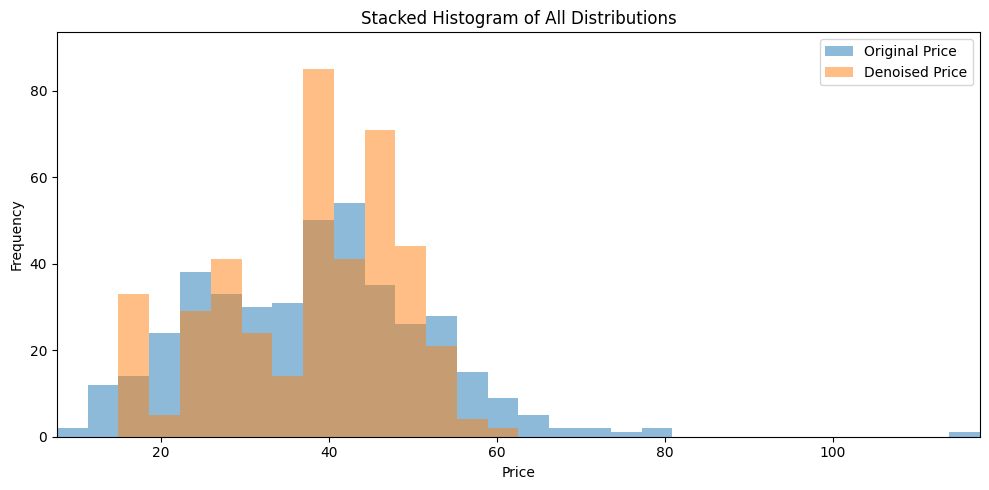

In [23]:
y_denoised = candidate_function(X)
plot_histograms([(y, 'Original Price', None), (y_denoised, 'Denoised Price', None)], 'Price', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

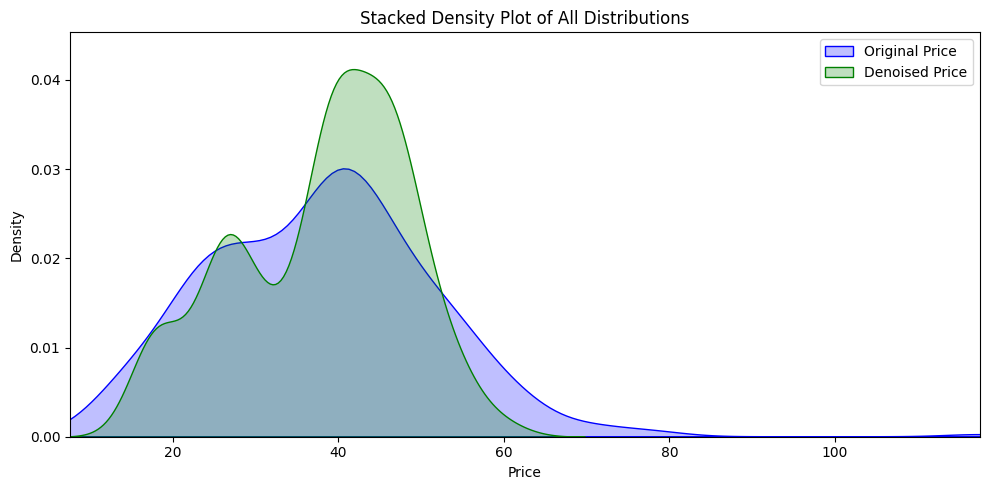

In [24]:
plot_densities([(y, 'Original Price', 'blue'), (y_denoised, 'Denoised Price', 'green')], 'Price', stack=True, figsize_per_plot=(10, 5))

In [18]:
orig_residuals = y - y_denoised

In [19]:
y_renoised, best_amp, errors, _ = renoise_predictions(y, y_denoised, method='stratified', seed=42, clip_lower=0, clip_upper=None, original_residuals=None, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run

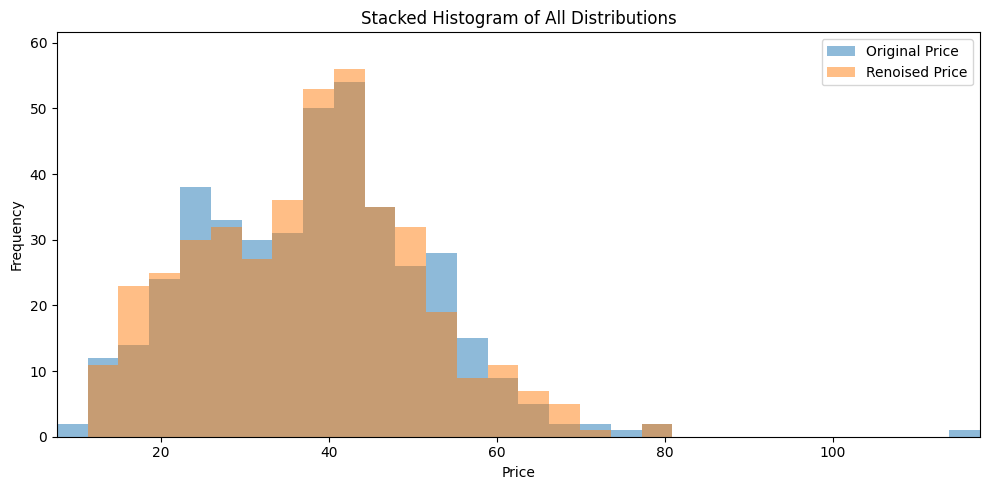

In [25]:
plot_histograms([(y, 'Original Price', None), (y_renoised, 'Renoised Price', None)], 'Price', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

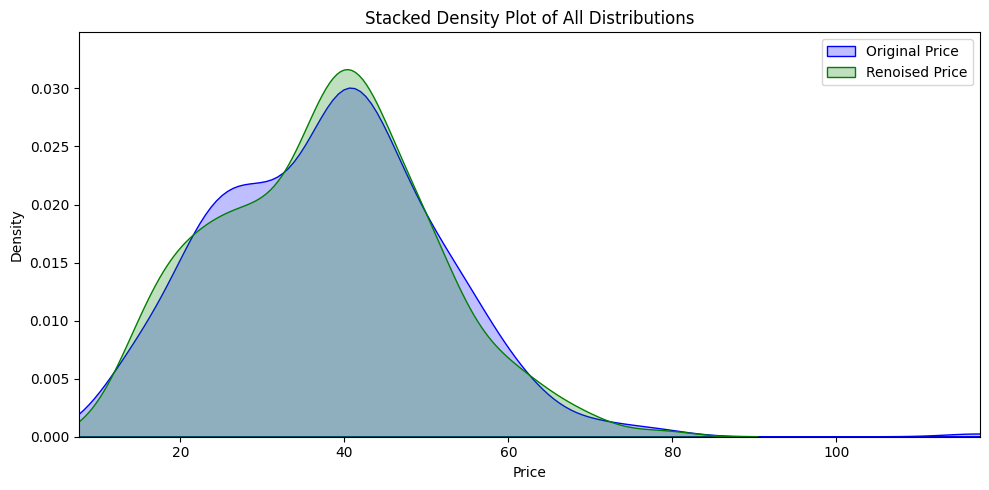

In [26]:
plot_densities([(y, 'Original Price', 'blue'), (y_renoised, 'Renoised Price', 'green')], 'Price', stack=True, figsize_per_plot=(10, 5))

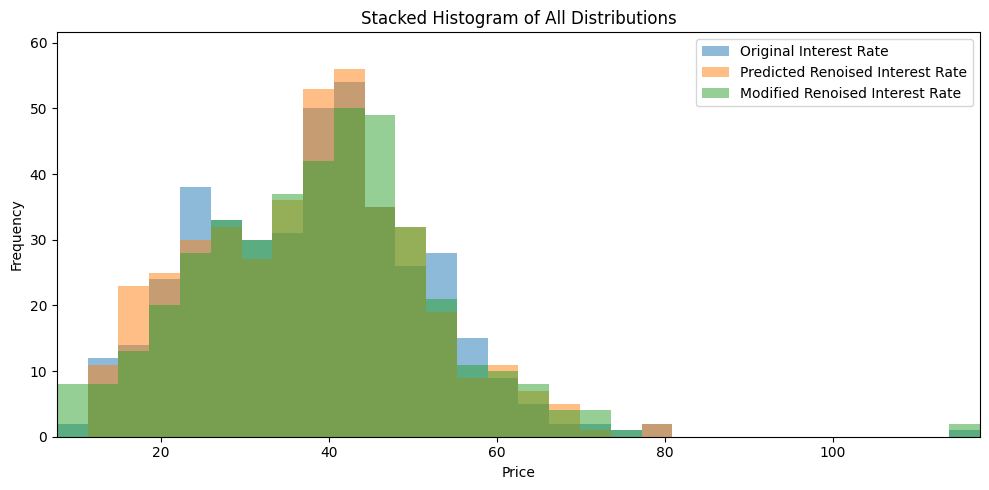

In [52]:
mod_candidate_function = generate_candidate_function("(log(1.0*x0 + -5.5*x1) + -11.083734) / sin(x2 + 0.037937894)")
mod_y_denoised_total = mod_candidate_function(X)
mod_y_renoised, best_amp, errors, _ = renoise_predictions(y, mod_y_denoised_total, method='stratified', amplification_factor=1.0, seed=42, clip_lower=0, clip_upper=None, original_residuals=orig_residuals, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run
plot_histograms([(y, 'Original Interest Rate', None), (y_renoised, 'Predicted Renoised Interest Rate', None), (mod_y_renoised, 'Modified Renoised Interest Rate', None)], 'Price', stack=True, figsize_per_plot=(10, 5))